### Importing important libraries for the prediction

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Uploading the dataset in the notebook 

In [3]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

@hidden_cell

body = client_6398a810b94b42b7ad72fc92de7e6523.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-tnxknw6yewxpyo',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data=data.drop('Country',axis=1)

In [5]:
data

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [6]:
data['Status']=data['Status'].map({'Developed':1,'Developing':0})

In [44]:
data=data.drop('Schooling',axis=1)

In [45]:
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454


In [46]:
data.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
Year                               2938 non-null int64
Status                             2938 non-null int64
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2490 non-null

In [48]:
data.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000
mean,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000
25%,2004.000000,0.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000
75%,2012.000000,0.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000


In [49]:
data.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
dtype: int64

In [50]:
data1=data

In [51]:
data1=data1.dropna()

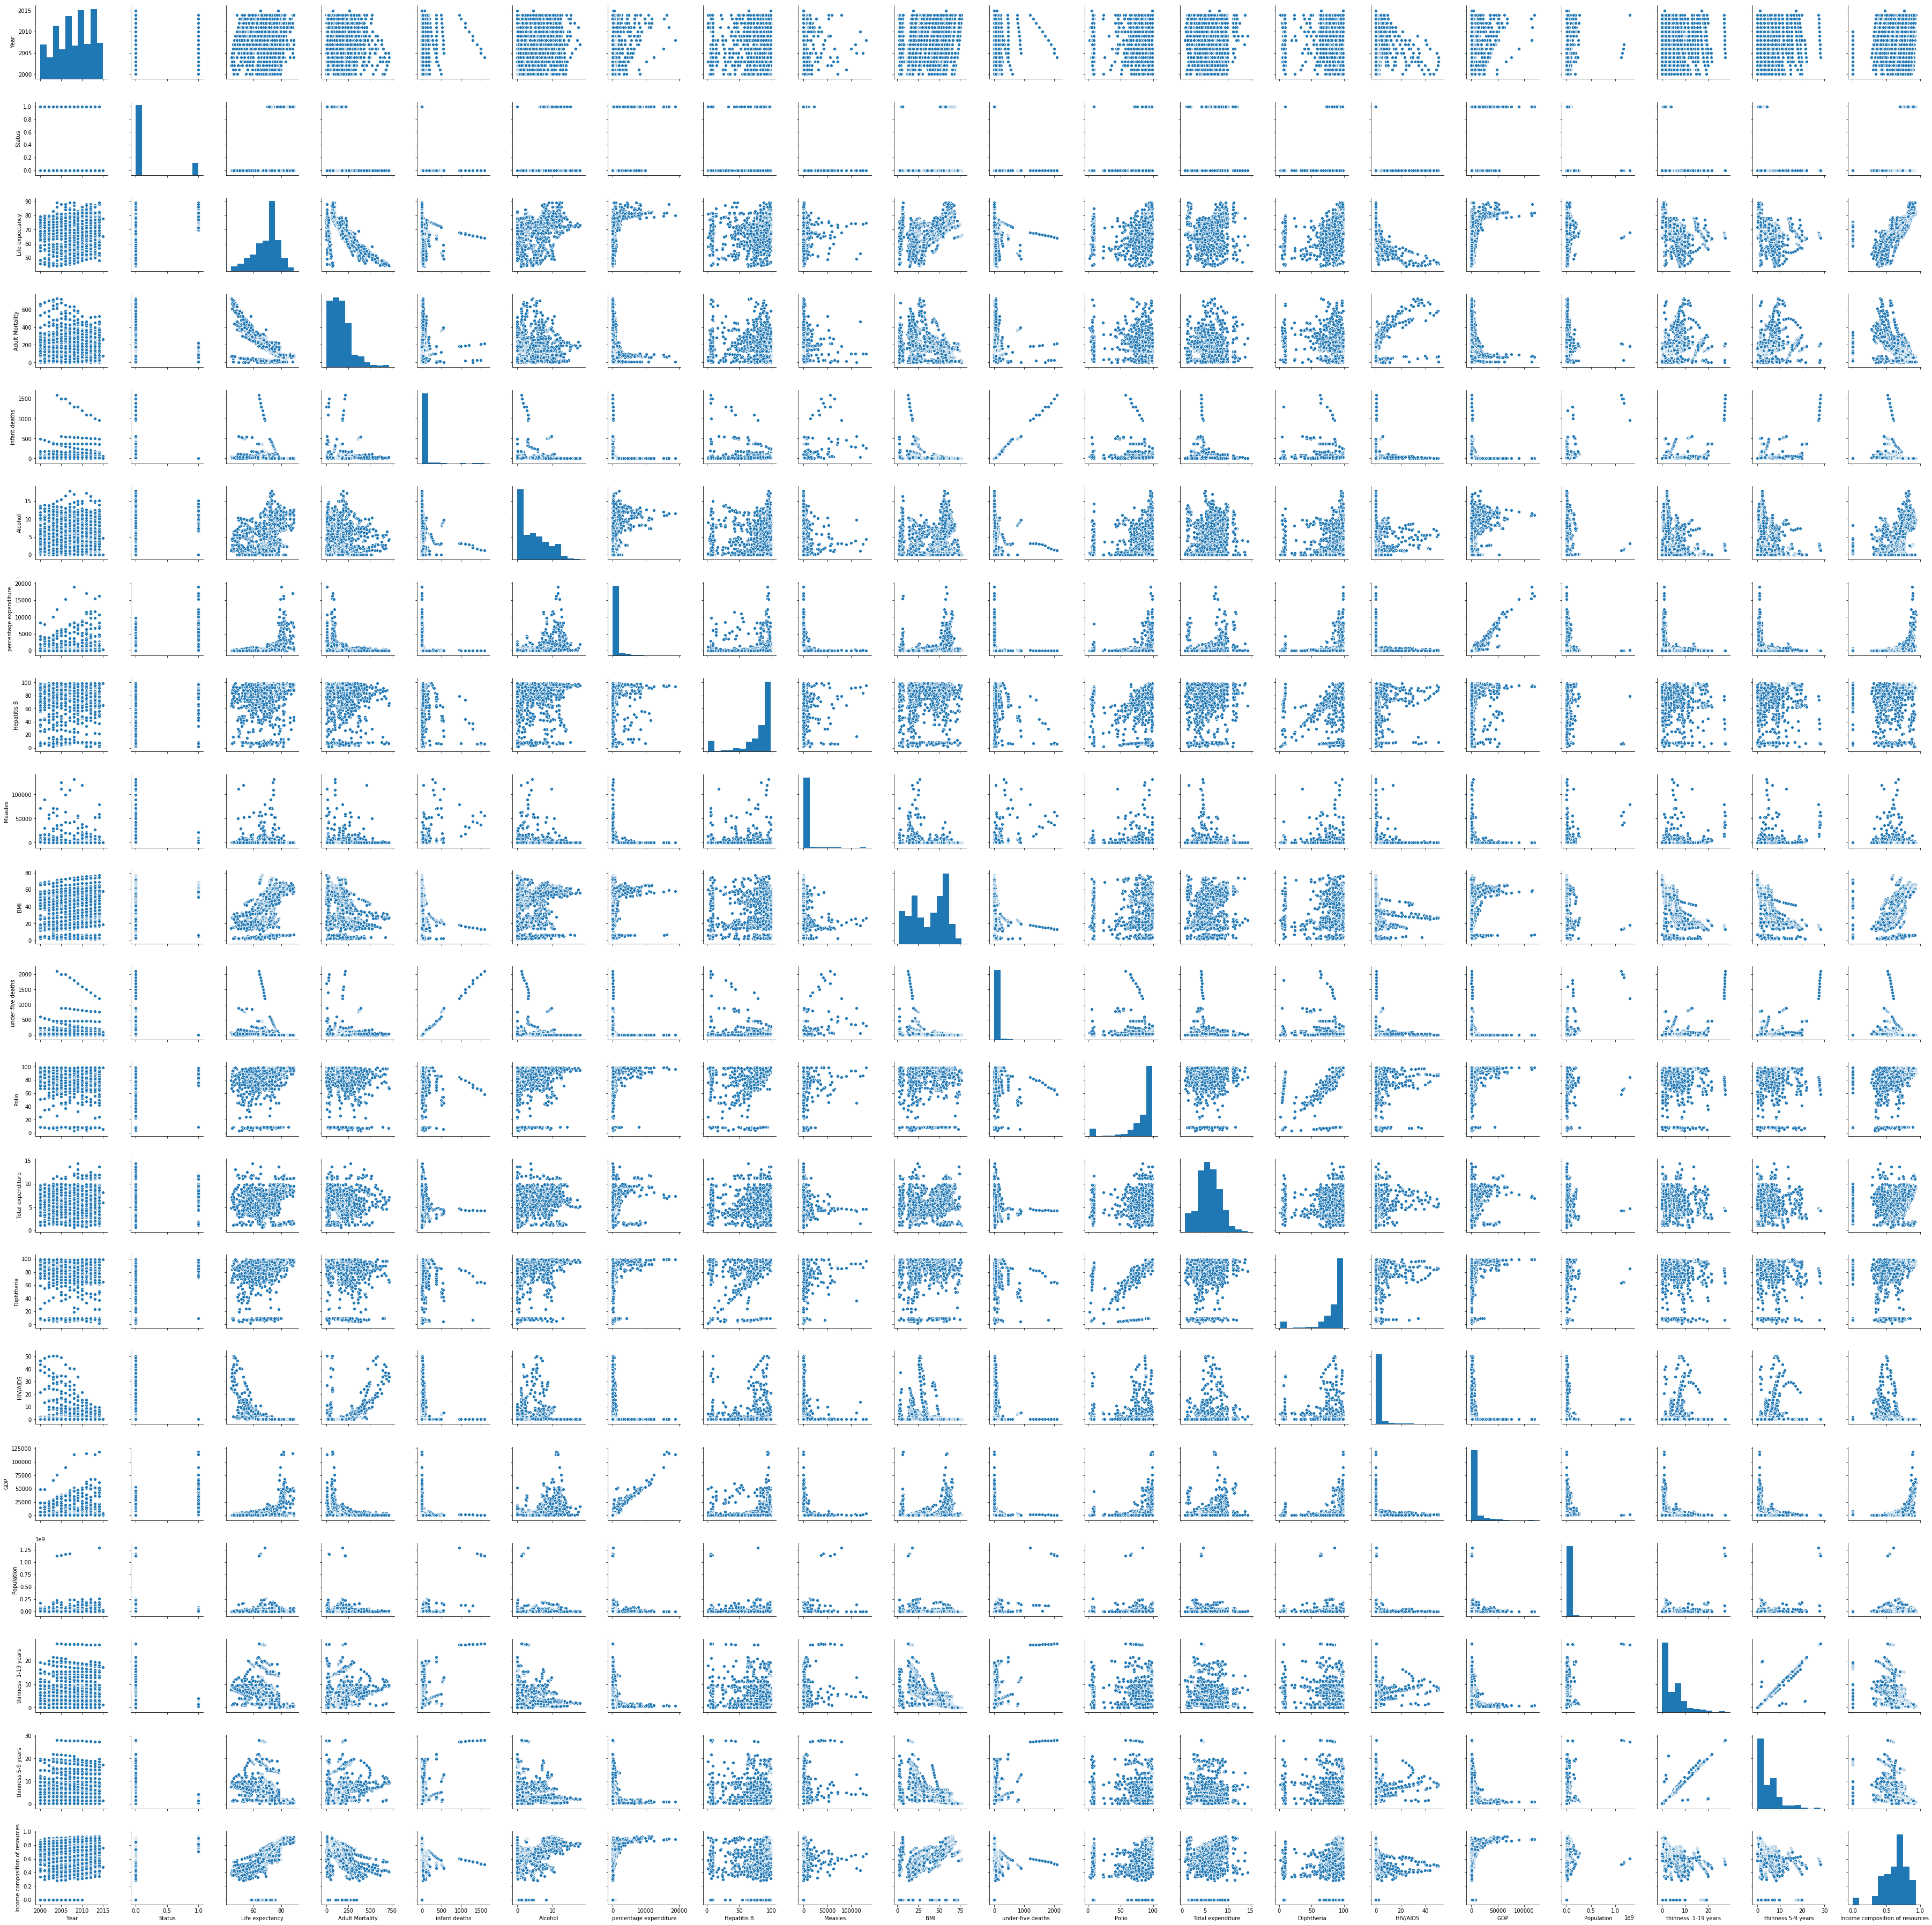

In [52]:
sns.pairplot(data1)

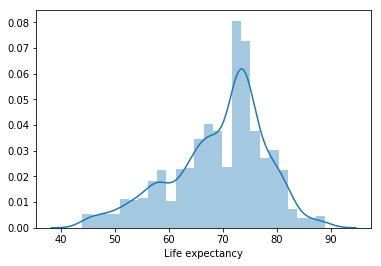

In [53]:
sns.distplot(data1['Life expectancy'])

### For visualizaing the dataset we have heatmap function of seaborn library, with its help we can find the correlation between the coloumns 

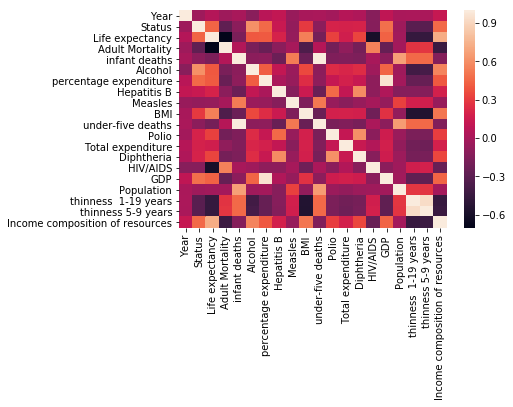

In [54]:
sns.heatmap(data1.corr())

In [56]:
x=data1[['Year','Status','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources']]
y=data1['Life expectancy']
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2853    69.6
2854    69.4
2855    69.3
2856    69.1
2857    69.0
2907    61.1
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 1649, dtype: float64

### Now our model is ready for training and testing

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
lm.score(x_train,y_train)

0.8206989989495352

In [63]:
lm.score(x_test,y_test)

0.7993007797377842

In [64]:
print(lm.intercept_)

230.16307387938656


In [65]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,-8.562580e-02
Status,1.567765e+00
Adult Mortality,-1.824113e-02
infant deaths,9.499120e-02
Alcohol,2.732111e-02
percentage expenditure,-2.010171e-05
Hepatitis B,-2.936662e-03
Measles,-1.299980e-05
BMI,4.426885e-02
under-five deaths,-7.291926e-02


In [66]:
predictions = lm.predict(x_test)

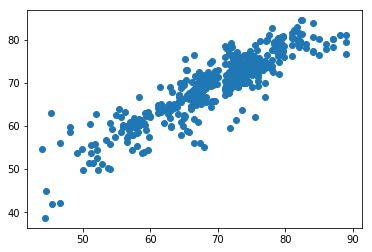

In [68]:
plt.scatter(y_test,predictions)

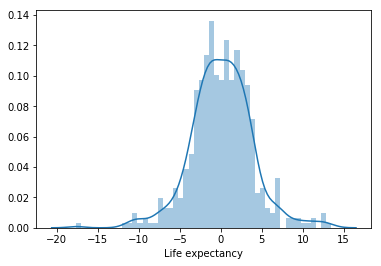

In [69]:
sns.distplot((y_test-predictions),bins=50);

### Here, we are calculating different error like mean square error, mean absolute error and root mean squared error.

In [70]:
from sklearn import metrics

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.8453057958937213
MSE: 14.357755961917498
RMSE: 3.7891629632304675


In [72]:
!pip install watson-machine-learning-client

In [73]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [76]:
@hidden_cell
wml_credentials={
  "apikey": "jC9q7up4ja7twIo8FFIU54EW0s52lSzwUIq9mUt7rBgg",
  "instance_id": "c38cb3c2-df50-4fcc-871d-e403c6559a98",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [77]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [82]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "AnushkaD", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "anushkadwivedi17@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Predicting-Life-Expectancy"}

In [83]:
model_artifact =client.repository.store_model(lm, meta_props=model_props)

In [84]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [85]:
published_model_uid

'3ff284d4-4a30-4e5d-9774-b7ff25da6d7a'

In [86]:
#we are creating the variable for our model
deployment = client.deployments.create(published_model_uid, name="Predicting Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '3ff284d4-4a30-4e5d-9774-b7ff25da6d7a' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a21df645-903f-448b-b0f7-99803d3e59fd'
------------------------------------------------------------------------------------------------




In [87]:
#here we are generating scoring endpoint which is used for deployment
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [88]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/c38cb3c2-df50-4fcc-871d-e403c6559a98/deployments/a21df645-903f-448b-b0f7-99803d3e59fd/online'